#### Bike Sharing 자전거 대여수 예측
* 1. Data Load
* 2. Data Preprocessing(전처리)
* 3. Visualization (시각화)
* 4. Feature Engineering(Selection)
* 5. Model 생성, fit, predict
* 6. Submission(제출)

In [45]:
import pandas as pd

train = pd.read_csv('data/bike/train.csv', parse_dates=['datetime'])
print(train.shape)
test = pd.read_csv('data/bike/test.csv', parse_dates=['datetime'])
print(test.shape)

(10886, 12)
(6493, 9)


In [46]:
train.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


In [47]:
# season 계절
train['season'].value_counts()

4    2734
3    2733
2    2733
1    2686
Name: season, dtype: int64

In [48]:
# holiday 휴일여부
train['holiday'].value_counts()

0    10575
1      311
Name: holiday, dtype: int64

In [49]:
# workingday 근무일여부
train['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [50]:
# weather 날씨여부
train['workingday'].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [51]:
# temp 온도
train['temp'].value_counts()

14.76    467
26.24    453
28.70    427
13.94    413
18.86    406
22.14    403
25.42    403
16.40    400
22.96    395
27.06    394
24.60    390
12.30    385
21.32    362
13.12    356
17.22    356
29.52    353
10.66    332
18.04    328
20.50    327
30.34    299
9.84     294
15.58    255
9.02     248
31.16    242
8.20     229
27.88    224
23.78    203
32.80    202
11.48    181
19.68    170
6.56     146
33.62    130
5.74     107
7.38     106
31.98     98
34.44     80
35.26     76
4.92      60
36.90     46
4.10      44
37.72     34
36.08     23
3.28      11
38.54      7
0.82       7
39.36      6
2.46       5
1.64       2
41.00      1
Name: temp, dtype: int64

In [52]:
# atemp 체감온도
train['atemp'].value_counts()

31.060    671
25.760    423
22.725    406
20.455    400
26.515    395
16.665    381
25.000    365
33.335    364
21.210    356
30.305    350
15.150    338
21.970    328
24.240    327
17.425    314
31.820    299
34.850    283
27.275    282
32.575    272
11.365    271
14.395    269
29.545    257
19.695    255
15.910    254
12.880    247
13.635    237
34.090    224
12.120    195
28.790    175
23.485    170
10.605    166
35.605    159
9.850     127
18.180    123
36.365    123
37.120    118
9.090     107
37.880     97
28.030     80
7.575      75
38.635     74
6.060      73
39.395     67
6.820      63
8.335      63
18.940     45
40.150     45
40.910     39
5.305      25
42.425     24
41.665     23
3.790      16
4.545      11
43.940      7
43.180      7
2.275       7
3.030       7
44.695      3
0.760       2
1.515       1
45.455      1
Name: atemp, dtype: int64

In [53]:
# windspeed 온도
train['windspeed'].value_counts()

0.0000     1313
8.9981     1120
11.0014    1057
12.9980    1042
7.0015     1034
15.0013     961
6.0032      872
16.9979     824
19.0012     676
19.9995     492
22.0028     372
23.9994     274
26.0027     235
27.9993     187
30.0026     111
31.0009      89
32.9975      80
35.0008      58
39.0007      27
36.9974      22
43.0006      12
40.9973      11
43.9989       8
46.0022       3
56.9969       2
47.9988       2
50.0021       1
51.9987       1
Name: windspeed, dtype: int64

In [54]:
# humidity 습도
train['humidity'].value_counts()

88    368
94    324
83    316
87    289
70    259
     ... 
13      1
10      1
12      1
96      1
91      1
Name: humidity, Length: 89, dtype: int64

In [55]:
# 대여수 count
train['count'].value_counts()

5      169
4      149
3      144
6      135
2      132
      ... 
667      1
603      1
587      1
970      1
843      1
Name: count, Length: 822, dtype: int64

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [57]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#### 2. Data Preprosessing

In [58]:
train_test_data = [train, test]

for data in train_test_data:
    # 년도
    data['datetime-year'] = data['datetime'].dt.year
    # 월
    data['datetime-month'] = data['datetime'].dt.month
    # 일
    data['datetime-day'] = data['datetime'].dt.day
    # 시
    data['datetime-hour'] = data['datetime'].dt.hour
    # 분
    data['datetime-minute'] = data['datetime'].dt.minute
    # 초
    data['datetime-second'] = data['datetime'].dt.second
    # 요일
    data['datetime-dayofweek'] = data['datetime'].dt.dayofweek

#### 2. Data Proprocessing

#### 3. Visualization(시각화)

In [59]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

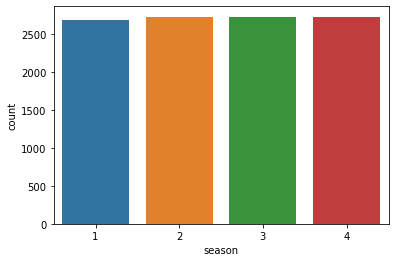

In [60]:
sns.countplot(data=train, x='season')

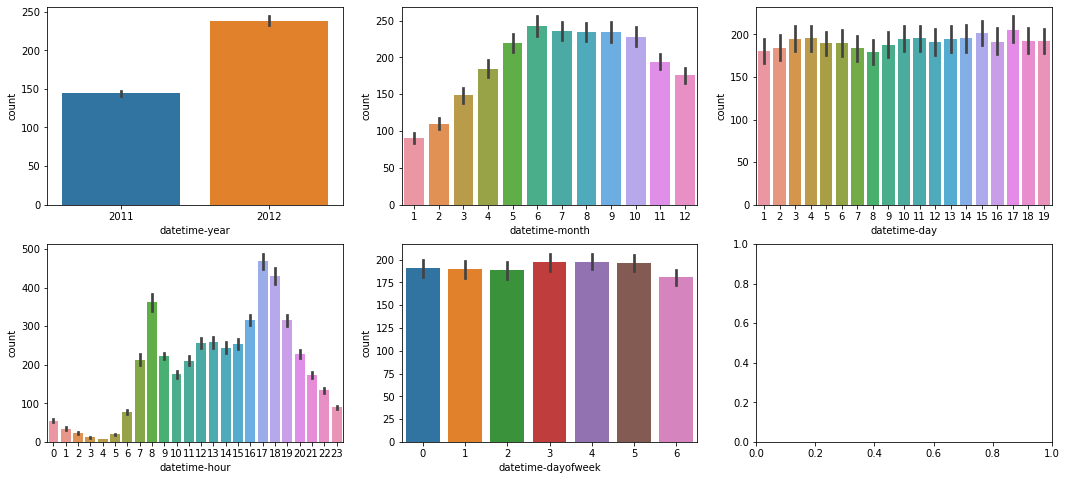

In [61]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)

sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)
sns.barplot(data=train, x='datetime-day', y='count', ax=ax3)
sns.barplot(data=train, x='datetime-hour', y='count', ax=ax4)
sns.barplot(data=train, x='datetime-dayofweek', y='count', ax=ax5)


In [62]:
# 년도와 월을 합친 datetime-year-month 컬럼 추가하기
train['datetime-year-month'] = \
train['datetime-year'].astype('str') + '-' + train['datetime-month'].astype('str')

train[['datetime-year', 'datetime-month', 'datetime-year-month']].head(3)

,datetime-year,datetime-month,datetime-year-month
0,2011,1,2011-1
1,2011,1,2011-1
2,2011,1,2011-1


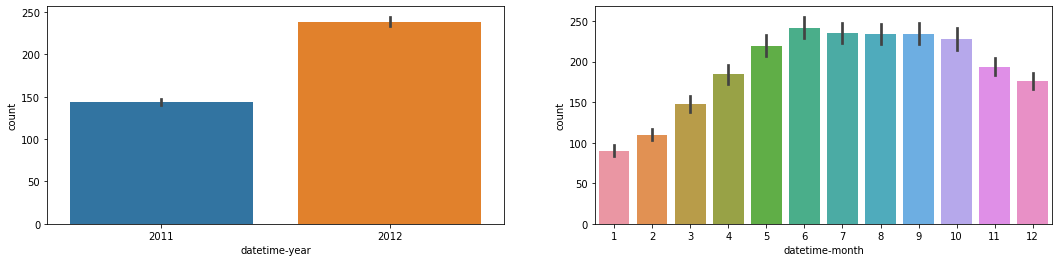

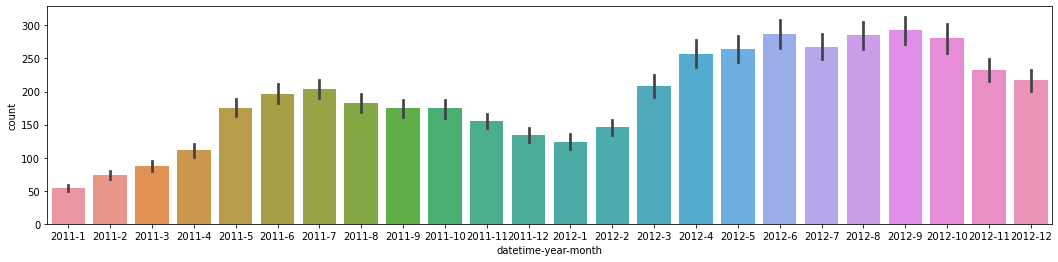

In [63]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
figure.set_size_inches(18,4)
sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)
sns.barplot(data=train, x='datetime-year-month', y='count', ax=ax3)

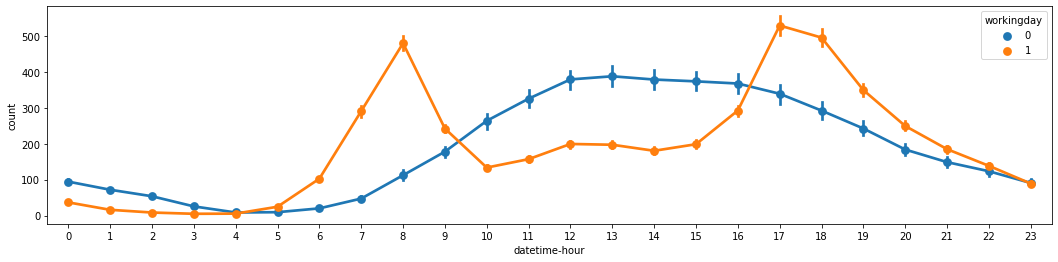

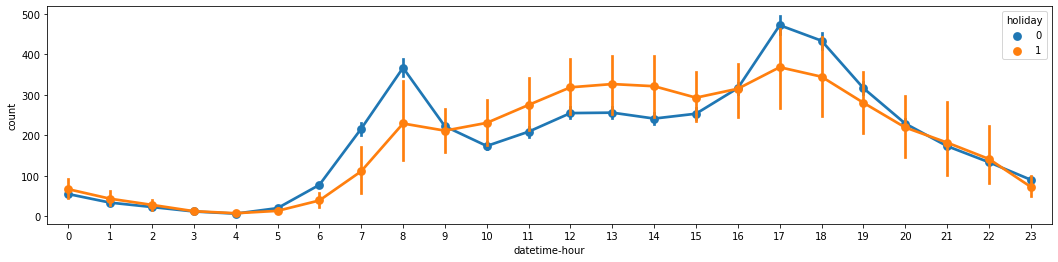

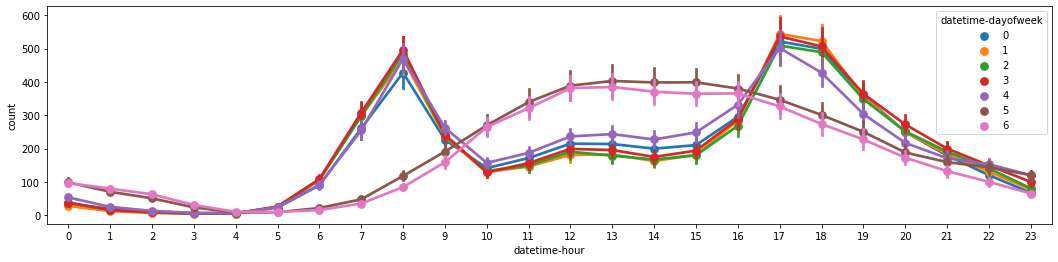

In [64]:
figure, ax1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='datetime-hour', y='count', hue='workingday', ax=ax1)

figure, ax2 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='datetime-hour', y='count', hue='holiday', ax=ax2)

figure, ax3 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,4)

sns.pointplot(data=train, x='datetime-hour', y='count', hue='datetime-dayofweek', ax=ax3)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


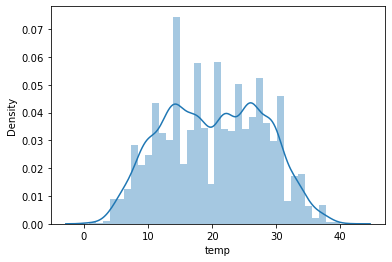

In [65]:
sns.distplot(train['temp'], hist=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


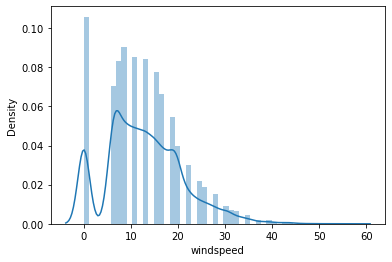

In [66]:
sns.distplot(train['windspeed'], hist=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


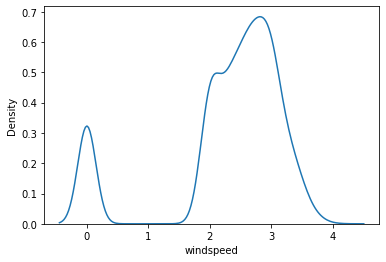

In [67]:
# windspeed 값에 log() 함수를 적용
import numpy as np

windspeed_log = np.log1p(train['windspeed'])
sns.distplot(windspeed_log, hist=False)

#### 4. Feature selection

In [68]:

test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-month',
       'datetime-day', 'datetime-hour', 'datetime-minute', 'datetime-second',
       'datetime-dayofweek'],
      dtype='object')

In [69]:
# feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
#        'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-hour', 'datetime-dayofweek', 'datetime-month']

feature_names = ['season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'datetime-year', 'datetime-hour', 'datetime-dayofweek']

In [70]:
# 훈련 데이터 독립변수 생성하기
label_name = 'count'

X_train = train[feature_names]
print(X_train.shape)
X_train.head(3)

(10886, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5


In [71]:
# 검증데이터 독립변수 생성하기
X_test = test[feature_names]
print(X_test.shape)
X_test.head(3)

(6493, 11)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,datetime-year,datetime-hour,datetime-dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3


In [72]:
# 훈련 데이터 종속변수 생성하기
label_name = 'count'

y_train = train[label_name]
print(y_train.shape)
y_train.head(5)

(10886,)


0    16
1    40
2    32
3    13
4     1
Name: count, dtype: int64

In [73]:
import numpy

#훈련데이터의 종속변수의 분포를 균등하게 하기 위해서 log() 함수를 사용한다.
y_train = np.log(y_train + 1)
print(y_train.shape)
y_train.head()

(10886,)


0    2.833213
1    3.713572
2    3.496508
3    2.639057
4    0.693147
Name: count, dtype: float64

#### 5. 모델 생성, 학습 및 예측하기
##### Ensemble(앙상블) 학습 방법
* 서로 다른 모델들을 결합하여 학습하는 방식을 앙상블이라고 한다.
* 앙상블의 유형은 보팅(Voting), 배깅(Bagging) 방식이 있다.
* 보팅과 배깅은 여러개의 분류기가 투표를 통해서 최종 예측결과를 결정하는 방식
* 보팅은 서로 다른 알고리즘을 가진 분류기를 결합하는 방식
* 배깅은 같은 알고리즘 기반이며, 데이터 샘플링을 서로 다르게 가져가면서 학습하는 방식
* RandomForest 모델을 사용 - 배깅방식

In [74]:
from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor(random_state=156)
# model

model = RandomForestRegressor(random_state=156, n_estimators=3000, \
                              max_depth=83, max_features=0.851358)
model

RandomForestRegressor(max_depth=83, max_features=0.851358, n_estimators=3000,
                      random_state=156)

#### 제출전에 Score 확인
* 선형회귀는 예측값과 실제값(훈련데이터 세트에 있는 y) 사이의 평균제곱오차(MSE)를 최소화하는
  w,b를 찾는다. y = wx + b
* MSE(Mean Squarred Error) - 실제값과 예측값의 차이를 제곱해서 평균한 값
* RMSE(Root Mean Squarred Error) - MSE가 실제 오류 평균보다 더 커질 수 있어서 Root를 씌운 값 *
* scoring에 neg_mean_absolute_error를 적용해서 음수값을 반환하는 이유
  - sklearn의 scoring() 함수가 score 값이 클수록 좋은 평가지표로 판단하기 때문에 -1(음수)를 원래의 평가지표 값에 곱해서 작은 오류값이 더 큰 숫자로 인식하기 위해서 예를 들어, 10 > 1 이지만 음수를 곱하면 -1 > -10

In [75]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model, X_train, y_train, cv=20, scoring='neg_mean_absolute_error').mean()

score = -1.0 * score
print("Score {0:.5f}".format(score))

import numpy as np
score = np.round(score, 4)

Score 0.24718


In [76]:
# 학습하기
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=83, max_features=0.851358, n_estimators=3000,
                      random_state=156)

In [77]:
# 예측하기
predictions = model.predict(X_test)
print(predictions.shape)
predictions

(6493,)


array([2.51436952, 1.74764635, 1.42040437, ..., 4.60070927, 4.58142179,
       3.86932022])

In [78]:
# 예측한 결과를 지수함수 exp() 로 변환해서 제출
predictions = np.exp(predictions) - 1
print(predictions.shape)
predictions

(6493,)


array([11.35881439,  4.74107429,  3.13879369, ..., 98.55490192,
       96.65313755, 46.90980667])

In [79]:
# 제출하기
submit = pd.read_csv('data/bike/sampleSubmission.csv')
print(submit.shape)
submit.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


In [80]:
submit['count'] = predictions
submit.head()

,datetime,count
0,2011-01-20 00:00:00,11.358814
1,2011-01-20 01:00:00,4.741074
2,2011-01-20 02:00:00,3.138794
3,2011-01-20 03:00:00,3.261908
4,2011-01-20 04:00:00,2.664005


In [83]:
# first 0.47059
# second 0.41854
# third 0.39721
# ford 0.39138

In [82]:
submit.to_csv(f'data/bike/result_{score}.csv', index=False)